In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
# import matplotlib.font_manager as fm

In [2]:
# # 한글 폰트
# plt.style.use('seaborn')
# fm.get_fontconfig_fonts()
# font_location = 'font/NanumGothic.ttf'
# fprop = fm.FontProperties(fname=font_location)

In [3]:
## 데이터 준비
raw_df = pd.read_csv('data/preprocessed_labelled_final_df.csv')
df=raw_df[['구체적 기재', '사업의 트렌디 여부', '고객 세분화', '핵심활동 창의성, 효율성', '파트너십', '핵심자원']]

In [36]:
df[3:4]

,구체적 기재,사업의 트렌디 여부,고객 세분화,"핵심활동 창의성, 효율성",파트너십,핵심자원
3,2,0,2,2,1,0


In [37]:
# 예시용 데이터프레임
sample = df[3:4]

In [38]:
# 레이더 차트를 저장하는 함수
# df:위 예시용 데이터프레임이 들어가야함
# 현재 디렉토리에 'savefig_smaple.png'로 저장됨

def save_radar_chart(df):
    stack = df.stack()
    stack[stack == 2] = 9
    stack[stack == 1] = 6
    stack[stack == 0] = 3
    df = stack.unstack()

    df = df.rename(columns={'구체적 기재':'Specific description',
                      '사업의 트렌디 여부':'Trendy in business',
                      '고객 세분화':'Customer segmentation',
                      '핵심활동 창의성, 효율성':'Core Activities',
                      '파트너십':'Partnership',
                      '핵심자원':'Core resources'})


    ## 따로 그리기
    labels = df.columns[:]
    num_labels = len(labels)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

    my_palette = plt.cm.get_cmap("Set2", len(df.index))

    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white')

#     for i, row in df.iterrows():
    color = my_palette(0)
#         data = df.iloc[i].tolist()
    data = df.iloc[0].tolist()
    data += data[:1]

    ax = plt.subplot(1,1,1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

    plt.xticks(angles[:-1], labels, fontsize=20) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.

    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([3,6,9],['C','B','A'], fontsize=15) ## y축 눈금 설정
    plt.ylim(0,9)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    # plt.title(row['기업명'], size=30, color=color,x=-0.2, y=1.2, ha='left', fontproperties=fprop) ## 타이틀은 캐릭터 클래스로 한다.

    plt.tight_layout(pad=5) ## subplot간 패딩 조절
    # plt.show()
    plt.savefig('savefig_smaple.png')

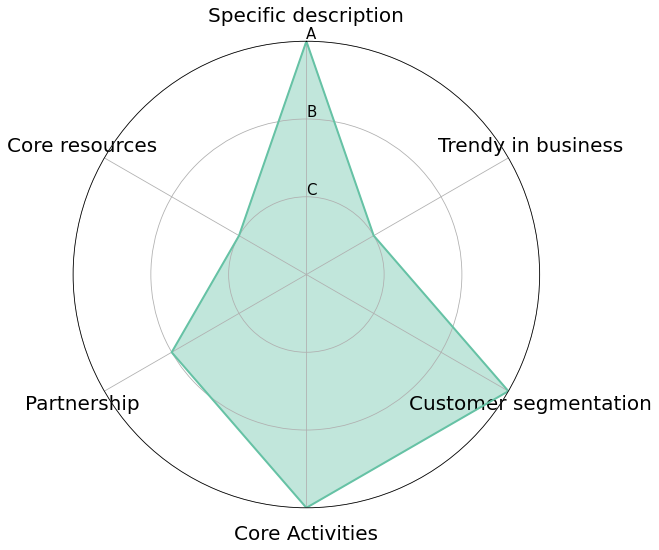

In [39]:
# 함수실행
save_radar_chart(sample)